<a href="https://colab.research.google.com/github/Rogerio-mack/Ling-de-Prog-para-Ciencia-de-Dados/blob/master/ACD_T2_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Complementar - Visualização dos Dados com Matplotlib e Seaborn
---


# Introdução 

Aqui você irá aprender a empregar as bibliotecas `Matplotlib` e `Seaborn` para criar visualizações dos dados que são muito úteis para compreendermos grandes conjuntos de dados. 

A visualização de dados é antes de tudo uma forma de transmitir ou comunicar os dados com precisão e existem ao menos dois tipos de visualização de dados com requisitos bastante diferentes. O primeiro é voltado para a análise e envolve a **Exploração dos Dados** como a descoberta padrões, relações e processos em ação sobre os dados. Neste tipo de visualização você experimenta diferentes tipos de gráficos e visualizações, de transformações e seleções dos dados. Aspectos estéticos das figuras produzidas tem aqui uma importância secundária.

O segundo tipo de visualização tem por objetivo a **Apresentação** de Resultados e busca fornecer informações claras e visualmente atraentes para uma apresentação ou a sua publicação. Aqui, a qualidade das figuras produzidas é mais essencial e devem ser atraentes e comunicar de forma eficiente os dados para um determinado público.

Ambos os tipos de visualização podem ser feitos com `Python`, assim como em outras linguagens e ferramentas. Não tratamos em profundidade aqui a *visualização* de dados em si, o que você deve explorar mais adiante em outras componentes, mas tratamos principal de como produzir essas visualizações em `Python` e, mais adiante, com R. A ideia aqui é instrumentá-lo aqui para produzir os gráficos que serão úteis em muitas análises de dados. 





# Gráficos em `Matplotlib`

O pacote `Matplotlib` é uma biblioteca gráfica para visualização de dados em `Python`. Ela é desenvolvida sobre arrays `NumPy` e uma das bibliotecas mais empregadas para visualização de dados em `Python`. Outros importantes  pacotes de visualização de dados como o `Seaborn`, `Plotly`, `Altair` estendem a interface do `Matplotlib`. Por isso, é importante entender como produzir gráficos com o `Matplotlib` e é a biblioteca que usaremos na maior parte dos casos aqui. O `Seaborn` é uma biblioteca de visualização de dados `Python` construída sobre `Matplotlib` que fornece uma interface de mais alto nível para desenhar gráficos e possui muitos recursos atraentes e em alguns casos empregaremos essa biblioteca.  


In [ ]:
# imports empregados nesta seção. Eles podem se repetir abaixo para enfatizar os recursos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Um gráfico de linha simples `plt.plot(x,y)`

Os gráficos de linha são os gráficos mais simples e, antes explorarmos outros tipos de gráficos, vamos entender como criar gráficos de linha com o `Matplotlib`. Eles ainda são particularmente úteis para representar gráficos de funções. 

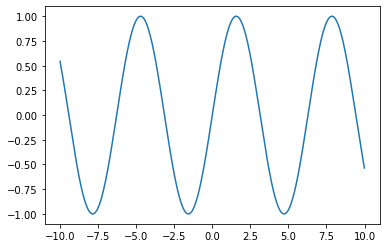

In [ ]:
import numpy as np

import matplotlib.pyplot as plt             
%matplotlib inline

x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x))
plt.show()

Acima você encontra primeiramente o `import` do pacote `Matplotlib`.  

Você pode empregar o `Matplotlib` em um script `Python`, em um terminal `Python` interativo (`IPython`) ou em um `Python notebook`. Todas as execuções aqui serão feitas em `Python notebooks` e ao empregarmos o comando `%matplotlib inline` estamos dizendo ao backend de execução do `Python` que os gráficos produzidos pelo `Matplotlib` serão incluídos em seu notebook, juntamente com o código. 

A função `show()` concluí a exibição de um gráfico. Ela atua com o backend gráfico interativo do sistema e os detalhes de suas operações variam conforme o contexto de execução. Basicamente ela procura os objetos ativos para a construção da figura abre uma ou mais janelas para exibir a saída dos gráficos. No caso de uma execução em `Python notebook`, ela exibe a figura abaixo da célula de código sem a numeração da célula `out[]` (para Jupyter notebooks) ou texto de referência do objeto construído (Colab). Ela aparece no final dos scripts de comandos gráficos e uma única vez.  

Você ainda pode adicionar títulos, rótulos aos eixos, legendas e alterar propriedades da linha como estilo e cor. 

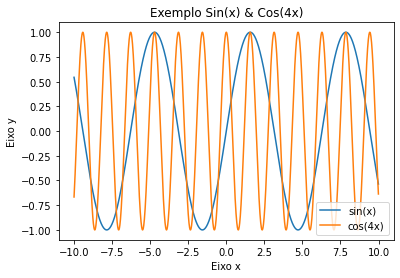

In [ ]:
import numpy as np

import matplotlib.pyplot as plt             
%matplotlib inline

x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(4*x), label='cos(4x)')

plt.title('Exemplo Sin(x) & Cos(4x)')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.legend()

plt.show()

Note que gráficos das duas funções acimas são sobrepostos. Ao executar o comando `plot` existe uma única 'figura' ativa, e todos os comandos, como título, legendas e rótulos, são direcionados do mesmo modo que o `plot` para a mesma figura. A função `show()` se encarrega depois de combinar todos objetos ativos em uma única figura. Experimente inlcuir o `plt.show()` após o primeiro `plot` e veja o resultado.

## Empregando a interface direta ou de objetos `Script Layer` & `Artist Layer` 

Os comandos em `Matplotlib` podem ser empregados de duas formas. Na interface direta (ou `Script Layer`) o `Matplotlib` mantém o controle da figura e eixos 'atuais' onde as funções `plt` serão aplicadas. Essa é uma forma simples e útil, e vamos usá-la na maior parte do tempo. É, entretanto, uma forma complicada quando trabalhamos com múltiplos gráficos ou conjuntos de gráficos com uma apresentação muito complexa. 

A interface orientada a objetos (ou `Artist Layer`) permite um maior controle das figuras e você deve preferir essa interface quando múltiplos gráficos ou figuras muito elaboradas são empregados. Nela você pode apontar explicitamente a 'figura' (`fig`) os gráficos contidos dentro dela (`ax` ou `axis` dependendo do caso).

Compare os gráficos abaixo. O primeiro emprega a interface direta. Em uma figura com múltiplos gárficos, cada novo gráfico é ativado (`subplot(linhas, colunas, gráfico ativo)`) e todos os comandos `plt` são então direcionados para o gráfico ativo. A execução seguinte emprega a interface orientada a objetos e os comando `plot` são direcionados explicitamente para cada gráfico (`ax[i]`).

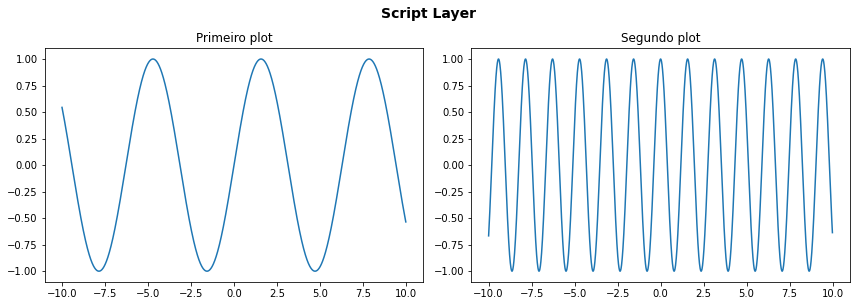

In [ ]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Script Layer', fontsize=14, weight='bold', y=1.05)

# cria e ativa um gráfico na figura
plt.subplot(1, 2, 1) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.sin(x))
plt.title('Primeiro plot')

# cria e ativa um segundo gráfico na figura
plt.subplot(1, 2, 2) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.cos(4*x));
plt.title('Segundo plot')

plt.tight_layout()
plt.show()

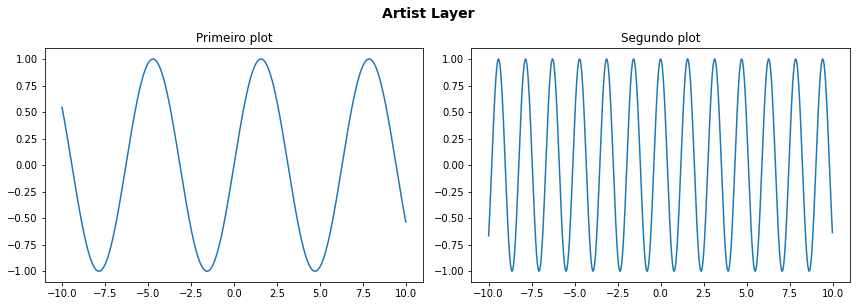

In [ ]:
# Cria uma grade de gráficos com 1 linha e 2 colunas de gráficos, ax é um vetor em que cada elemento corresponde a um gráfico da grade
fig, ax = plt.subplots(1,2,figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)

# Os comandos podem então ser direcionados para o gráfico específico
ax[0].plot(x, np.sin(x))
ax[0].set_title('Primeiro plot')

ax[1].plot(x, np.cos(4*x));
ax[1].set_title('Segundo plot')

plt.tight_layout()
plt.show()

Mais adiante você verá melhor como criar múltiplos gráficos. Por hora é suficiente você entender que existem essas duas formas de trabalho com o  `Matplotlib`.

## Propriedades de linha `linestyle`, `marker`, `color`, `linewidth` e `markersize`

Você pode alterar várias das propriedades das linhas dos gráficos como estilo da linha, cor e sua espessura. Isso é importante para diferenciar várias linhas em um mesmo gráfico ou ainda se você quiser dar destaque a uma ou mais linhas. 

Essas propriedades podem ser codificadas explicitamente: 

```
plt.plot(x, np.cos(x), linestyle='dashed', marker='o', color='green', linewidth=1, markersize=6)
```

Ou de forma resumida:

```
plt.plot(x, np.cos(x), '--og', linewidth=1, markersize=6)
```

A expressão `'--og'` agrupa os parâmetros `--`, `o` e `g` e indicam respectivamente os mesmos parâmetros que o modo explícito `linestyle='dashed', marker='o', color='green'`. Mesmo na forma resumida eles podem aparecer em qualquer ordem, uma vez que os símbolos de cada parâmetro não se repetem. As cores nesse modo ficam entretanto limitadas ao um conjunto de cores básicas `rgbcmyk` (`r`=red, `g`=green, ...). 

O esquema de cores é bastante sofisticado e permite empregar de cores básicas à tons de cinza, como também especificar valores de cada componente RGB (esquema de combinação de cores básicas Red, Green, Blue) e transparência de linhas (parâmetro `alpha`). 

A seguir o primeiro gráfico mostra como empregar o uso dos parâmetros explícitos e de forma resumida, e o gráfico seguinte mostra como essas configurações podem ser empregadas para dar destaque a uma ou mais linhas em um gráfico. 




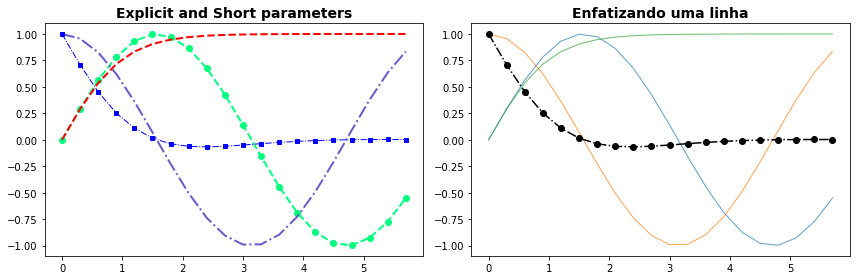

In [ ]:
x = np.arange(0, 6, 0.3)

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('Explicit and Short parameters', fontsize=14, weight='bold')
plt.plot(x, np.sin(x), color='springgreen', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.plot(x, np.cos(x), color='slateblue', linestyle='dashdot', linewidth=2)

# short color code (rgbcmyk)
plt.plot(x, np.tanh(x), '--r', linewidth=2, markersize=6)
plt.plot(x, 1/np.exp(x)*np.cos(x), '-.sb', linewidth=1, markersize=4)

plt.subplot(1, 2, 2)
plt.title('Enfatizando uma linha', fontsize=14, weight='bold')
plt.plot(x, np.sin(x), linewidth=1, alpha=0.7)
plt.plot(x, np.cos(x), linewidth=1, alpha=0.7)
plt.plot(x, np.tanh(x), linewidth=1, alpha=0.7)
plt.plot(x, 1/np.exp(x)*np.cos(x), '-.ok')

plt.tight_layout()
plt.show()


> $\bigstar \text{  }$ *Você pode empregar diferentes estilos de linha apenas para diferenciar as linhas em gráficos de múltiplos, mas também pode empregar o recurso para destacar a uma ou mais linhas do gráfico.* 

Abaixo você também encontra alguns exemplos de estilos de linha, marcadores e cores básicas mais empregados. Eles serão suficientes aqui e você pode consultar a documentação do `Matplotlib` para uma relação completa desses parâmetros. 

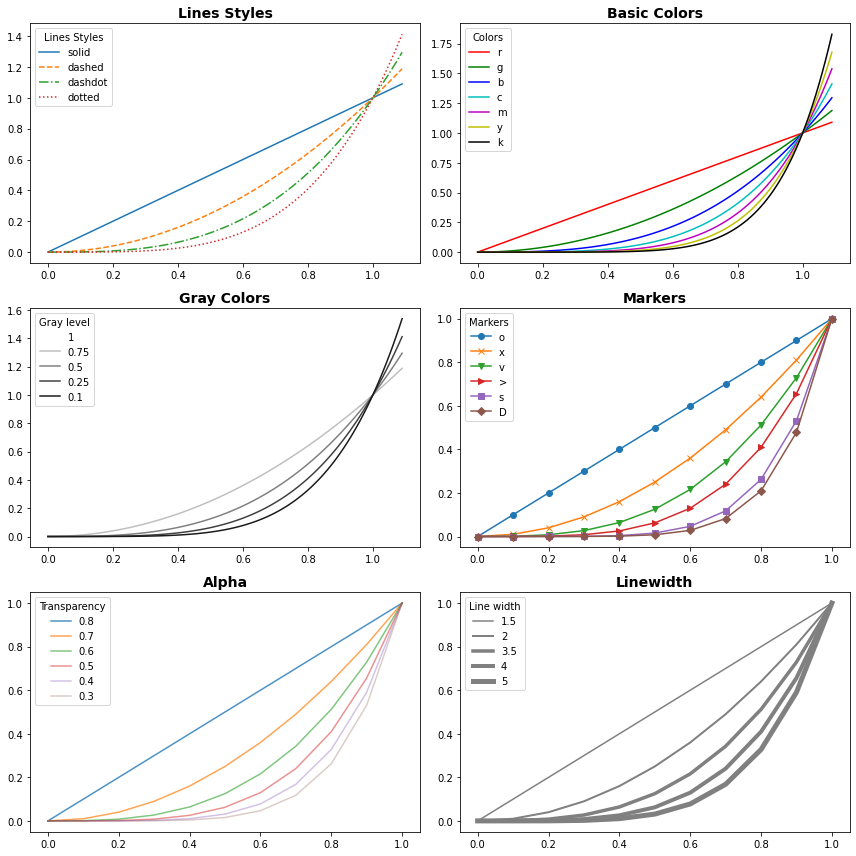

In [ ]:
x = np.arange(0.0, 1.1, 0.01)

fig = plt.figure(figsize=(12,12))

plt.subplot(3, 2, 1)
plt.title('Lines Styles', fontsize=14, weight='bold') # automatic colors
plt.plot(x, x**1, linestyle='solid', label='solid')
plt.plot(x, x**2, linestyle='dashed', label='dashed')
plt.plot(x, x**3, linestyle='dashdot', label='dashdot')
plt.plot(x, x**4, linestyle='dotted', label='dotted')
plt.legend(title='Lines Styles')

plt.subplot(3, 2, 2)
plt.title('Basic Colors', fontsize=14, weight='bold')
plt.plot(x, x**1, color='r', label='r')
plt.plot(x, x**2, color='g', label='g')
plt.plot(x, x**3, color='b', label='b')
plt.plot(x, x**4, color='c', label='c')
plt.plot(x, x**5, color='m', label='m')
plt.plot(x, x**6, color='y', label='y')
plt.plot(x, x**7, color='k', label='k')
plt.legend(title='Colors')

plt.subplot(3, 2, 3)
plt.title('Gray Colors', fontsize=14, weight='bold')
plt.plot(x, x**1, color='1', label='1')
plt.plot(x, x**2, color='0.75', label='0.75')
plt.plot(x, x**3, color='0.5', label='0.5')
plt.plot(x, x**4, color='0.25', label='0.25')
plt.plot(x, x**5, color='0.1', label='0.1')
plt.legend(title='Gray level')

x = np.arange(0.0, 1.1, 0.1) # para melhor exibição dos dados com markers

plt.subplot(3, 2, 4)
plt.title('Markers', fontsize=14, weight='bold')
plt.plot(x, x**1, marker='o', label='o')
plt.plot(x, x**2, marker='x', label='x')
plt.plot(x, x**3, marker='v', label='v')
plt.plot(x, x**4, marker='>', label='>')
plt.plot(x, x**6, marker='s', label='s')
plt.plot(x, x**7, marker='D', label='D')
plt.legend(title='Markers')

# o parâmetro alpha permite configurar um grau de transparência nas cores de linha
plt.subplot(3, 2, 5)
plt.title('Alpha', fontsize=14, weight='bold')
plt.plot(x, x**1, alpha=0.8, label='0.8')
plt.plot(x, x**2, alpha=0.7, label='0.7')
plt.plot(x, x**3, alpha=0.6, label='0.6')
plt.plot(x, x**4, alpha=0.5, label='0.5')
plt.plot(x, x**5, alpha=0.4, label='0.4')
plt.plot(x, x**6, alpha=0.3, label='0.3')
plt.legend(title='Transparency')

# empregando diferente espessuras de linha
plt.subplot(3, 2, 6)
plt.title('Linewidth', fontsize=14, weight='bold')
plt.plot(x, x**1, color='0.5', linewidth=1.5, label='1.5')
plt.plot(x, x**2, color='0.5', linewidth=2, label='2')
plt.plot(x, x**3, color='0.5', linewidth=3.5, label='3.5')
plt.plot(x, x**4, color='0.5', linewidth=4, label='4')
plt.plot(x, x**5, color='0.5', linewidth=5, label='5')
plt.legend(title='Line width')

plt.tight_layout()
plt.show()

## Textos: `title`, `labels`, `lengend` e `text`

Textos são um complemento importante de qualquer gráfico. Sem eles você não tem como saber exatamente ao que se refere cada eixo, sua escala ou sua unidade de medida. O título ainda pode explicitar a mensagem que você deseja passar e anotações ainda podem ajudar a indicar pontos específicos do gráfico que você deseja destacar. 

O `Matplotlib`, como outros pacotes de visualização, permite adicionar inúmeras anotações aos  gráficos como títulos, rótulos ou labels para as linhas, nomear os eixos ou até mesmo inserir uma anotação em uma posição específica do gráfico. Isso é muito importante para tornar claras as informações exibidas.

> $\bigstar \text{  }$ *Textos como rótulos dos eixos e outras anotações **não são opcionais**. A menos que conheça o contexto, não tem como você saber se um gráfico está apresentando a evolução de uma ação na bolsa no último ano ou a mudança de temperatura global na última década!*





O exemplo a seguir mostra como definir um título para o seu gráfico, nomear os eixos e como inserir rótulos (labels) para cada uma das linhas de um gráfico que emprega várias linhas. 
 


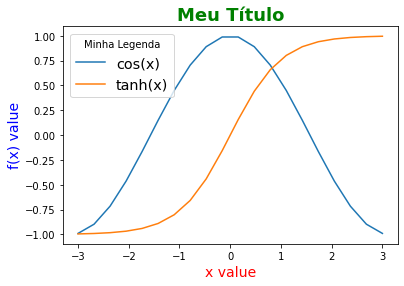

In [ ]:
x = np.linspace(-3, 3, 20)

plt.figure()

# Adicionando labels às diferentes linhas do gráfico
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, np.tanh(x), label='tanh(x)')

# Adicionando o Título
plt.title('Meu Título', color='green', fontsize=18, weight='bold', ha='center')

# Nomeando os eixos
plt.xlabel('x value', color='red', fontsize=14)
plt.ylabel('f(x) value', color='blue', fontsize=14)

# Exibindo a legenda
plt.legend(title='Minha Legenda', loc='best', fontsize='x-large')

plt.show()



Títulos e rótulos aceitam todas as configurações comuns de editores de texto como tamanhos de fonte (`fontsize`), cor (`color`), estilos (como por exemplo `weight='bold'` e `style='italic'`). Para tipos de fonte diferentes é necessário modificar parâmetros à partir do `plt.rcParams` e você pode querer experimentar por exemplo `plt.rcParams["font.family"] = "fantasy"` ou um outro tipo de fonte. Aqui manteremos sempre o uso da fonte padrão. 

Os títulos podem ser alinhados no centro (padrão), à esquerda ou à direita usando o parâmetro `ha` (`horizontalalignment`, e valores `'center','right'` ou `'left'`) e você pode deixar para o `Matplotlib` definir a melhor posição da legenda ou empregar o parâmetro de localização `loc` (`loc='upper right'`, `loc='lower left'`, `loc='center left'` etc.).

Quando trabalhando com múltiplos gráficos pode ser necessário adicionar também um `suptitle` ao conjunto de gráficos e empregamos isso em um exemplo anterior quando apresentamos o modo `Artist Layer`:

```
plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)
``` 

O `y=1.05` coloca o `suptitle` 0.05 acima da figura e evita a sobre posição dos títulos. O comando `plt.tight_layout()`, no mesmo exemplo, ajusta o automaticamente o layout da figura para evitar sobreposições dos gráficos, como por exemplo dos textos dos eixos de um gráfico com outro e vamos empregar bastante esse comando aqui.   

> $\bigstar \text{  }$ *Anotações dentro de um gráfico são essencias quando se quer chamar a atenção do leitor para um determinado ponto do gráfico.*

Para isso o `Matplotlib` fornece duas funções, o `plt.text()` e o `plt.annotate()`. O primeiro simplesmente adiciona um texto em uma posição `x, y`, o segundo, insere o texto adicionando uma seta do texto a um ponto do gráfico. 

Pontos específicos no gráfico podem ainda ser destacados, ou com o comando `plot()` destacando um ponto em coordenada específica, ou com a adição de linhas verticais (`vlines()`) ou horizontais (`hlines()`) informando a posição e os limites mínimo e máximo de cada linha.

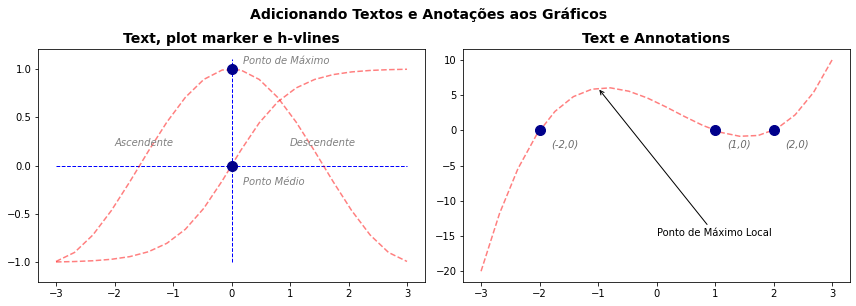

In [ ]:
x = np.linspace(-3, 3, 20)

fig = plt.figure(figsize=(12,4))
plt.suptitle('Adicionando Textos e Anotações aos Gráficos', fontsize=14, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.title('Text, plot marker e h-vlines', fontsize=14, weight='bold')
plt.plot(x, np.tanh(x), 'r--', alpha=0.5)
plt.plot(x, np.cos(x), 'r--', alpha=0.5)
plt.ylim([-1.2,1.2])

# Enfatizando um ponto específico do gráfico
plt.plot(0, 1, marker = 'o' , color = 'darkblue', markersize= 10)
plt.plot(0, 0, marker = 'o' , color = 'darkblue', markersize= 10)

# Adicionando anotações
plt.text(0 + 0.2, 0 - 0.2, 'Ponto Médio', style='italic', color='grey')
plt.text(0 + 0.2, 1 + 0.05, 'Ponto de Máximo', style='italic', color='grey')
plt.text(-2.0, 0.2, 'Ascendente', style='italic', color='grey')
plt.text(1, 0.2, 'Descendente', style='italic', color='grey')

# Adicionando linhas verticais e horizontais
plt.vlines(0, -1, 1.1, linestyle='dashed', color='b', linewidth=1) # vlines(posição, início, fim)
plt.hlines(0, -3, 3, linestyle='dashed', color='b', linewidth=1) # hlines(posição, início, fim)

plt.subplot(1, 2, 2)
plt.title('Text e Annotations', fontsize=14, weight='bold')
plt.plot(x, (x + 2) * (x - 1) * (x - 2), 'r--', alpha=0.5)

# Enfatizando vários pontos do gráfico
plt.plot([-2, 1, 2], [0, 0, 0], 'o', color='darkblue', markersize=10)

# Adicionando anotações
plt.text(-2 + 0.2, 0 - 2.4, '(-2,0)', style='italic', color='dimgrey')
plt.text(1 + 0.2, 0 - 2.4, '(1,0)', style='italic', color='dimgrey')
plt.text(2 + 0.2, 0 - 2.4, '(2,0)', style='italic', color='dimgrey')

# Annotate
plt.annotate('Ponto de Máximo Local', 
             xy=(-1, 6),                # ponto do gráfico
             xytext=(0, -15),           # posição do texto
             arrowprops=dict(arrowstyle="->")) 

plt.tight_layout()                    
plt.show()


## Limite dos eixos e escalas `xlim` e `ylim` 

O `Matplotlib` ajusta automaticamente os limites dos valores dos eixos x e y e as escalas empregadas. Muitas vezes, entretanto, esses valores não são os mais adequados e você pode querer alterá-los. O limites dos valores podem ser definidos empregando as funções `xlim` e `ylim`. 

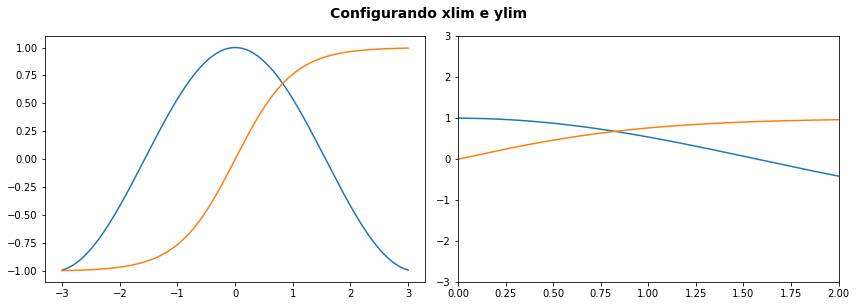

In [ ]:
x = np.linspace(-3, 3, 200)

fig = plt.figure(figsize=(12,4))
plt.suptitle('Configurando xlim e ylim', fontsize=14, weight='bold', y=1.05)

plt.subplot(1,2,1)
plt.plot(x, np.cos(x))
plt.plot(x, np.tanh(x))

plt.subplot(1,2,2)
plt.plot(x, np.cos(x))
plt.plot(x, np.tanh(x))
plt.xlim([0,2])
plt.ylim([-3,3])

plt.tight_layout()
plt.show()

Ao trabalhar múltiplos gráficos em uma figura podemos querer compartilhar as escalas dos eixos x e y deixando mais limpa e elegante a exibição dos gráficos. Para isso você pode empregar os parâmetros `sharex` ou `sharey` da função `subplots` conforme a escala do eixo que deseja compartilhar. No exemplo abaixo ainda inserimos uma 'grade' ao gráfico apresentando, assim, mais esse recurso.

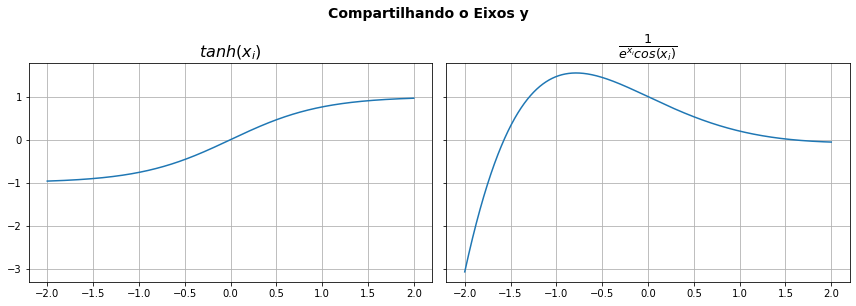

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4), sharey=True, sharex=True)
plt.suptitle('Compartilhando o Eixos y', fontsize=14, weight='bold', y=1.05)

# Mais pontos gerados para exibir diferentes réguas de dados nos eixos
x = np.linspace(-2, 2, 10000)

ax[0].set_title('$tanh(x_i)$', fontsize=16)
ax[0].plot(x, np.tanh(x))
ax[0].grid()

ax[1].set_title('$\\frac{1}{e^{x_i} cos(x_i)}$', fontsize=18)
ax[1].plot(x, 1/np.exp(x)*np.cos(x))
ax[1].grid()

plt.tight_layout()
plt.show()

Talvez você tenha notado que nos dois últimos exemplos, diferente dos exemplos anteriores, empregamos a interface orientada a objetos no lugar da interface direta e que comando para inserir o título foi ligeiramente diferente da forma que empregamos antes.

> $\bigstar \text{  }$ *Ao empregar a interface orientada a objetos as funções para se definir limites, rótulos e títulos diferem ligeiramente das funções empregadas na interface direta.* 

A maior parte das funções `plt` pode ser aplicada diretamente como métodos de eixo (por exemplo `plt.plot() → ax.plot()`) mas os comandos para definir limites, rótulos e títulos diferem ligeiramente quando empregados na interface orientada a objeto e adiciona-se o prefixo `set_` aos comandos: 

> ``plt.title()`` → ``ax.set_title()``

> ``plt.xlabel()``  → ``ax.set_xlabel()``

> ``plt.ylabel()`` → ``ax.set_ylabel()``

> ``plt.xlim()``  → ``ax.set_xlim()``

> ``plt.ylim()`` → ``ax.set_ylim()``

E o comando `ax.set()` ainda pode ser empregado para definir todas essas propriedades simultaneamente.

## $\LaTeX$

No exemplo anterior criamos títulos com expressões matemáticas empregando o texto entre símbolos `$`. Se você está familiarizado com a notação $\LaTeX$ para símbolos e expressões matemáticas você poderá empregar essa notação também nos textos do `Matplotlib` e é particularmente elegante para expressões que envolvem símbolos matemáticos como $\pi$, $\alpha$, $\lambda$, $\ge$, $\neq$, $\subseteq$, funções como $f(x)$, $\sigma(x)$, $\omega(x)$, $\cos(\theta)$ ou ainda expressões mais complexas como:

$$e = \mathop {\lim }\limits_{n \to \infty } \left( {1 + \frac{1}{n}} \right)^n$$

## Empregando Estilos

Como muitos outros pacotes de visualização o `Matplotlib` implementa um padrão de visualização dos dados como cores, estilos de linha, fontes que você pode alterar se quiser. Isso é muito útil por que permite que você não precise ficar definindo todas essas configurações, podendo adotar a configuração padrão e alterando somente os elementos que são de interesse. De fato, muitas vezes, empregamos somente as configuração padrão para produzir gráficos rapidamente para, em seguida, modificar os parâmetros conforme a nossa necessidade. 

Mas o `Matplotlib` ainda implementa vários *estilos* predefinidos com padrões diferentes que você pode escolher. 

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Por exemplo, o estilo 'ggplot' emula a estética do `ggplot`, um importante pacote de visualização da linguagem R. Para usar esse estilo, basta você empregar:

```
plt.style.context('ggplot') 
```
para todos os gráficos da sua sessão, ou ainda:

```
with plt.style.context('stylename'):
  <seu plot> 
```
para configurar temporariamente um estilo. 

Você pode ver abaixo gráficos com diferentes estilos padrão do `Matplotlib`, e pode modificar o código para experimentar outros.

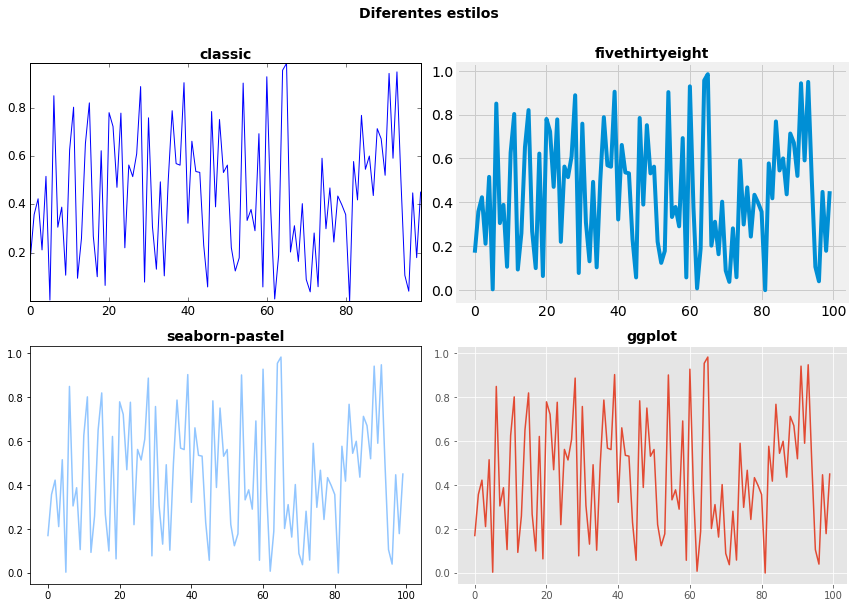

In [ ]:
# apenas a produção dos dados
x = np.random.random_sample(100)

plt.figure(figsize=(12,8))                         
plt.suptitle('Diferentes estilos', fontsize=14, weight='bold', y=1.05)

i = 1
for style in ['classic','fivethirtyeight','seaborn-pastel','ggplot']:
  with plt.style.context(style):
    plt.subplot(2, 2, i)  
    plt.plot(x)     
    plt.title(style, fontsize=14, weight='bold')    
    i = i + 1                   

plt.tight_layout()
plt.show()

plt.style.context('default')
plt.show()

## Salvando os Gráficos em um Arquivo

Salvar os gráficos para uso em algum outro aplicativo ou documento, como uma página web, um relatório ou uma apresentação é muito comum. O comando `savefig()` permite salvar seus gráficos em uma série de formatos como .JPG, .PNG, .PDF ou .SVG. e o parâmetro `savefig.dpi` dever ser empregado para aumentar a resolução e qualidade da imagem produzida.

> $\bigstar \text{  }$ *Empregue `plt.savefig( <arquivos>.JPG|PNG|PDF|SVG )` para salvar gráficos em arquivos no seu diretório de trabalho do `Python`.*


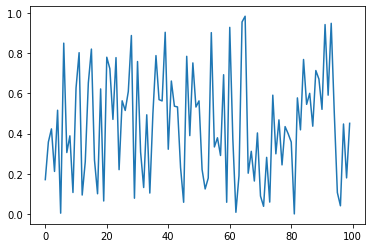

In [ ]:
plt.rcParams['savefig.dpi'] = 300

plt.plot(x)

plt.savefig('my_plot.png')
plt.savefig('my_plot.pdf')

plt.show()



# Evolução

Com o instrumental básico que vimos até aqui você pode começar a explorar diferentes dados.

Quando falamos de Evolução dos dados estamos interessados em observar a evolução de um conjunto de dados, o comportamento de uma ou mais variáveis dependentes, com relação ao crescimento de uma outra variável independente. Quando a evolução é observada ao longo do tempo, chamaremos esse conjunto de série temporal.

Vários conjuntos de dados de interesse apresentam essas características, como funções em geral e séries de dados históricas. Séries históricas de valores do PIB, número de internações diárias em um hospital, hits diários em um site de e-commerce ou a evolução das emissões de CO2 ao longo do tempo, para citar alguns exemplos.

Gráficos de linha, como os que empregamos até aqui, são comumente usados para observar a evolução dos dados. 


## Gráficos de Linha

Gráficos de linha são úteis para exibir funções e analisar a evolução de dados com relação a uma variável exibindo também a tendência dos dados. 

In [ ]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


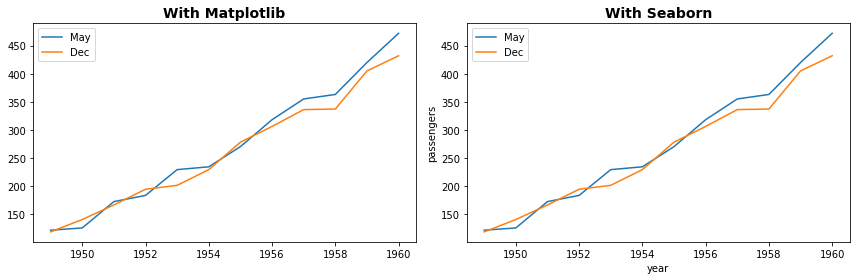

In [ ]:
plt.figure(figsize=(12,4))
flights_may = flights[ flights.month == 'May' ]
flights_dec = flights[ flights.month == 'Dec' ]

plt.subplot(1,2,1)
plt.plot(flights_may.year, flights_may.passengers, label='May')
plt.plot(flights_dec.year, flights_dec.passengers, label='Dec')
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.legend()

plt.subplot(1,2,2)
sns.lineplot(x=flights_may.year, y=flights_may.passengers, label='May')
sns.lineplot(x=flights_dec.year, y=flights_dec.passengers, label='Dec')
plt.title('With Seaborn',fontsize=14,weight='bold')
plt.legend()

plt.tight_layout()
plt.show()

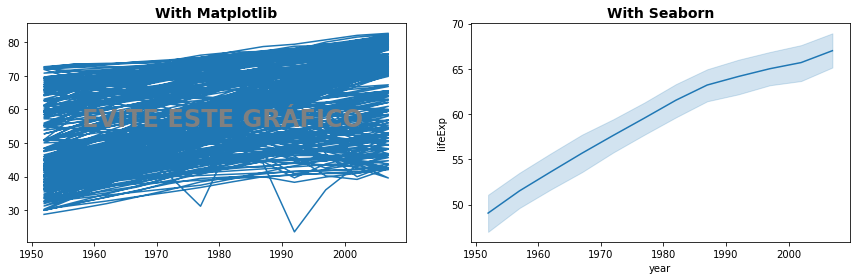

In [ ]:
# obtendo os dados
import plotly.express as px
df = px.data.gapminder() 

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(df.year, df.lifeExp)
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.text(1958, 55, 'EVITE ESTE GRÁFICO', fontsize=24, c='grey', weight='bold')

plt.subplot(1,2,2)
sns.lineplot(x=df.year, y=df.lifeExp)
plt.title('With Seaborn',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()


# Distribuição

Uma das perguntas mais importantes que podemos fazer sobre os dados é sobre sua distribuição e é um tema central da análise univariada. Você por exemplo já ouviu falar de uma distribuição normal. Várias medidas e fenômenos naturais seguem essa distribuição como medidas do corpo humano, como altura, peso, o peso de recém nascidos, o peso ou tamanho de sementes etc. Conhecer essa distribuição (basicamente sua média e variância) permite tomarmos decisões inferindo valores sobre amostras dos dados. Por exemplo, você pode definir a quantidades camisas que serão produzidas de cada tamanho baseada na distribuição da população, ou ajudar a inferir sobre o tamanho mais adequado de embalagens para receberem frutas sortidas de diferentes tamanhos. Mas existem muitos outros tipos de distribuição e não é por acaso que você já ouviu falar de que na origem de muitos dos problemas que enfrentamos está a distribuição de renda do Brasil. De fato, a renda no Brasil não segue uma distribuição normal e há muito mais brasileiros na faixa de valores de baixa renda que para faixas maiores. A distribuição neste caso é uma distribuição em calda, e é um dos principais fatores de desigualdade no país. Conhecer essa distribuição ajuda a estabelecer políticas públicas como valores de impostos a serem pagos, benefícios e isensões por faixa de renda, assim como conhecer a distribuição das idades da população por sexo permite estabelecer regras previdenciárias mais justas.

## Histogramas

Histogramas são gráficos que exibem a frequencia (quantidade) de casos para os valores, ou faixa de valores, de uma variável.

Note que em um histograma, assim como o gráfico de densidade a seguir, você informa **uma única variável**, `hist(x)`, que é exibida em duas de suas dimensões, sua **faixa de valores $\times$ frequência**, o quê difere de um `plot(x, y)` em que você explicitamente informa as duas dimensões a serem exibidas.



In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


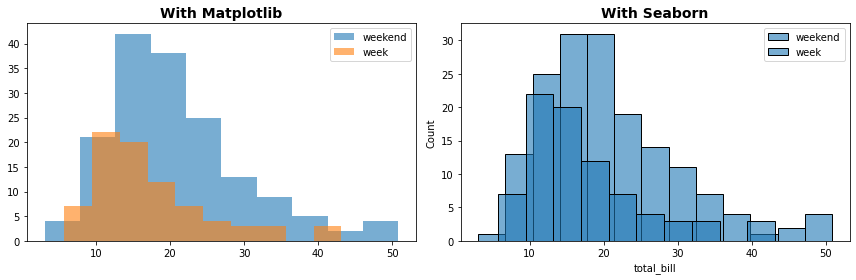

In [ ]:
plt.figure(figsize=(12,4))
tips_weekend = tips[ tips.day.isin(['Sun','Sat']) ]
tips_week = tips[ ~tips.day.isin(['Sun','Sat']) ]

plt.subplot(1,2,1)
plt.hist(tips_weekend.total_bill, alpha=0.6, label='weekend')
plt.hist(tips_week.total_bill, alpha=0.6, label='week')
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(tips_weekend.total_bill, alpha=0.6, label='weekend')
sns.histplot(tips_week.total_bill, alpha=0.6, label='week')
plt.title('With Seaborn',fontsize=14,weight='bold')
plt.legend()

plt.tight_layout()
plt.show()

## Gráficos de Densidade

Em princípio gráficos de densidade e histogramas exibem ambos distribuições dos dados. Mas o primeiro apresenta a frequência (quantidade absoluta) para as respectivas faixas de valores. O segundo apresenta a probabilidade dos valores, reescalando as quantidades de forma que a área abaixo do gráfico tenha valor 1 e representando, assim, a razão ou a densidade de probabilidade dos valores.

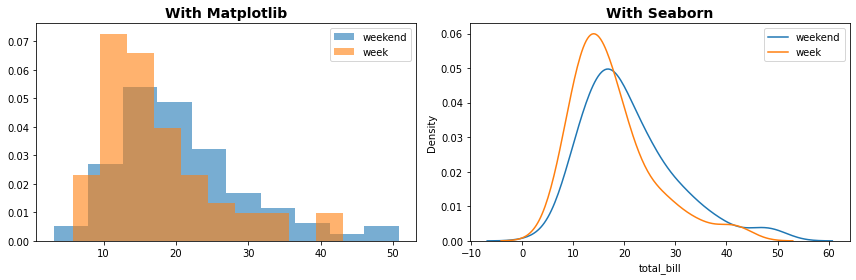

In [ ]:
plt.figure(figsize=(12,4))
tips_weekend = tips[ tips.day.isin(['Sun','Sat']) ]
tips_week = tips[ ~tips.day.isin(['Sun','Sat']) ]

plt.subplot(1,2,1)
plt.hist(tips_weekend.total_bill, density=True, alpha=0.6, label='weekend')
plt.hist(tips_week.total_bill, density=True, alpha=0.6, label='week')
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(tips_weekend.total_bill, alpha=0.6, label='weekend')
sns.kdeplot(tips_week.total_bill, alpha=0.6, label='week')
plt.title('With Seaborn',fontsize=14,weight='bold')
plt.legend()

plt.tight_layout()
plt.show()

## Gráficos de Caixa ou `Boxplot`

Gráficos de Caixa ou Boxplot foram introduzidos nos anos 70 por John Tukey e são uma forma sintética de representar distribuições dos dados a partir unicamente dos quartis dos valores. Os quartis, você deve lembrar, são os valores dos dados ordenados em ordem crescente, que dividem a distribuição em quatro partes iguais $(0,25%,50%,75%,100%)$, correspondendo assim aos valores (mínimo, Q1, mediana, Q3,máximo). Esses valores fornecem uma representação útil, embora bastante resumida, das distribuições dos dados.

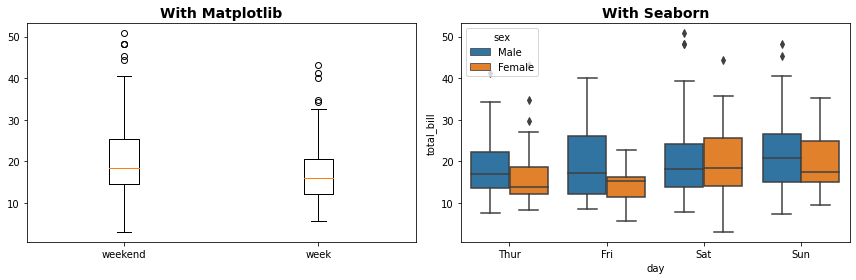

In [ ]:
plt.figure(figsize=(12,4))
tips_weekend = tips[ tips.day.isin(['Sun','Sat']) ]
tips_week = tips[ ~tips.day.isin(['Sun','Sat']) ]

plt.subplot(1,2,1)
plt.boxplot(tips_weekend.total_bill, positions=[0])
plt.boxplot(tips_week.total_bill, positions=[1])
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.xticks(ticks=[0,1],labels=['weekend','week'])

plt.subplot(1,2,2)
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('With Seaborn',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

O gráfico abaixo permite entender melhor as relações entre um gráfico de caixa e um gráfico de distribuição dos dados.

![imagem](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/_images/c4_parte_1_58_0.png)

# Quantidades e Proporções

Em muitos casos não estamos interessados na evolução dos dados ou mesmo na sua distribuição, mas queremos acessar os valores diretamente em suas unidades, exibindo esses valores para diferentes classes ou suas proporções (razão entre valores).

Para isso gráficos de barras e suas variantes são em geral os gráficos mais úteis e empregados. Um gráfico de barras apresenta a relação entre uma variável numérica e uma variável categórica sendo cada valor da variável categórica representado por uma barra vertical ou horizontal. O tamanho da barra representa o valor ou as quantidades.

## Gráficos de Barras

Esses gráficos são a ferramenta ideal se você quer exibir e comparar valores ou proporções de diferentes classes de dados. 

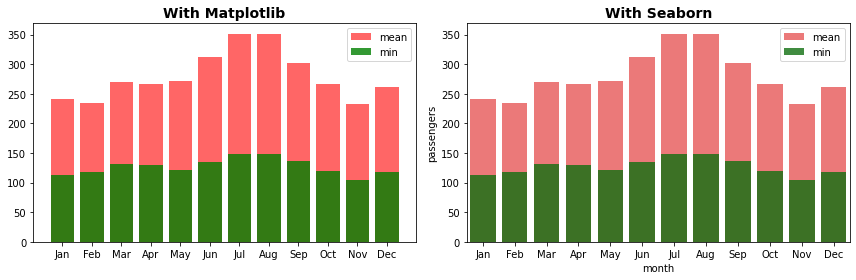

In [ ]:
plt.figure(figsize=(12,4))
flights_by_month = pd.DataFrame( flights.groupby('month').passengers.mean() ).reset_index()
flights_by_min = pd.DataFrame( flights.groupby('month').passengers.min() ).reset_index()

plt.subplot(1,2,1)
plt.bar(flights_by_month.month, flights_by_month.passengers, color='r', alpha=0.6, label='mean')
plt.bar(flights_by_min.month, flights_by_min.passengers, color='g', alpha=0.8, label='min')
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.legend()

plt.subplot(1,2,2)
sns.barplot(x=flights_by_month.month, y=flights_by_month.passengers, color='r', alpha=0.6, label='mean')
sns.barplot(x=flights_by_min.month, y=flights_by_min.passengers, color='g', alpha=0.8, label='min')
plt.title('With Seaborn',fontsize=14,weight='bold')
plt.legend()

plt.tight_layout()
plt.show()

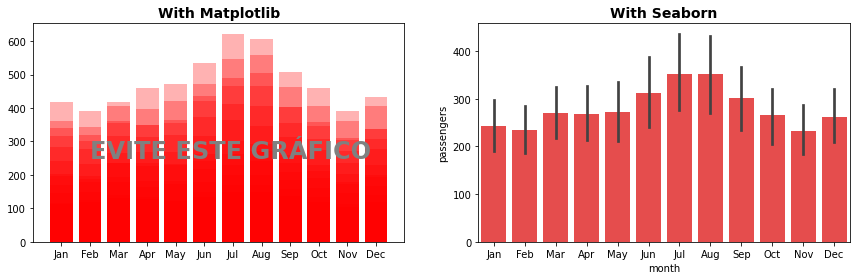

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(flights.month, flights.passengers, color='r', alpha=0.3)
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.text(1, 250, 'EVITE ESTE GRÁFICO', fontsize=24, c='grey', weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=flights.month, y=flights.passengers, color='r', alpha=0.8)
plt.title('With Seaborn',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

### Pie Charts

Gráficos de pizza são representações populares, sobretudo na mídia, e são freqüentemente empregados para mostrar as proporções de um todo. Mas são gráficos que encontram pouca aceitação por estatísticos, publicações acadêmicas e científicas, ou outros meios especializados sendo considerados gráficos bastante pobres. Em geral, você deve evitar esses gráficos e você pode ler mais sobre isso nas referências.






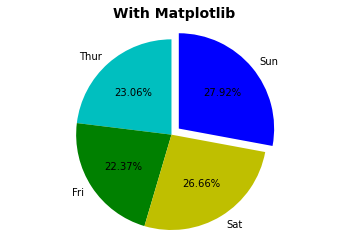

In [ ]:
tips_group = pd.DataFrame( tips.groupby('day').total_bill.mean() ).reset_index()

labels = tips_group.day
sections = tips_group.total_bill 
colors = ['c', 'g', 'y', 'b']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0, 0, 0.1),
        autopct = '%1.2f%%')

plt.axis('equal') 
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.show()

## Heat Maps

Mapas de Calor ou Heat Maps permitem visualizar dados multivariados exibindo variáveis ​​discretas (categóricas ou numéricas), nas linhas e colunas, e uma dimensão quantitativa colorindo as células do conjunto retangular de linhas e colunas. Os mapas de calor são ótimas representações para mostrar variações de valores em várias variáveis e identificar grupos de dados que apresentam um mesmo padrão de valores.

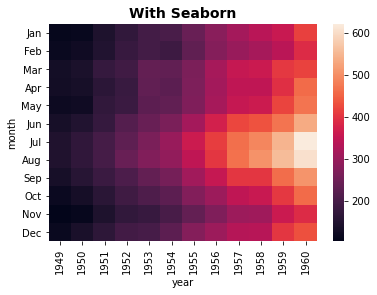

In [ ]:
flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights)
plt.title('With Seaborn',fontsize=14,weight='bold')

plt.show()

# Relações

Muitos conjuntos de dados contêm duas ou mais variáveis, e podemos estar interessados ​​em como essas variáveis ​​se relacionam entre si. De certo modo muitos dos gráficos podem ajudar nessa análise. 

## Gráficos de Dispersão

Os gráficos de dispersão (`scatter plots`), também chamados de gráficos de pontos ou diagramas de dispersão, são talvez o tipo mais empregado para análise de relações entre duas variáveis quantitativas. 





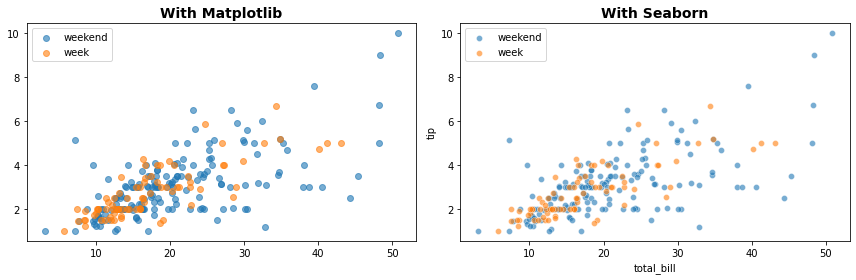

In [ ]:
plt.figure(figsize=(12,4))
tips_weekend = tips[ tips.day.isin(['Sun','Sat']) ]
tips_week = tips[ ~tips.day.isin(['Sun','Sat']) ]

plt.subplot(1,2,1)
plt.scatter(tips_weekend.total_bill, tips_weekend.tip, alpha=0.6, label='weekend')
plt.scatter(tips_week.total_bill, tips_week.tip, alpha=0.6, label='week')
plt.title('With Matplotlib',fontsize=14,weight='bold')
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x=tips_weekend.total_bill, y=tips_weekend.tip, alpha=0.6, label='weekend')
sns.scatterplot(x=tips_week.total_bill, y=tips_week.tip, alpha=0.6, label='week')
plt.title('With Seaborn',fontsize=14,weight='bold')
plt.legend()

plt.tight_layout()
plt.show()

### Adicionando uma linha de tendência

Na análise dessas relações é comum adicionarmos aos gráficos de dispersão linhas de tendências dos dados que nos ajudam a compreender melhor a sua evolução. Isso tem muitas formas de ser feito e aqui vamos nos limitar a adição de uma linha de tendência linear.  

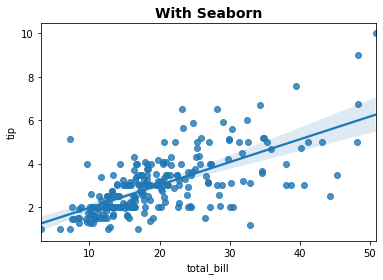

In [ ]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('With Seaborn',fontsize=14,weight='bold')

plt.show()

## Correlograma

Correlogramas são simplesmente gráficos de dispersão de diferentes pares de variáveis, e vão permitir separar uma visualização de dados com muitas relações e que são mais fáceis de analisar individualmente. Isso permite evitarmos um problema comum dos gráficos de dispersão que é o *overplotting*, em que exibimos muitas relações simultaneamente. 



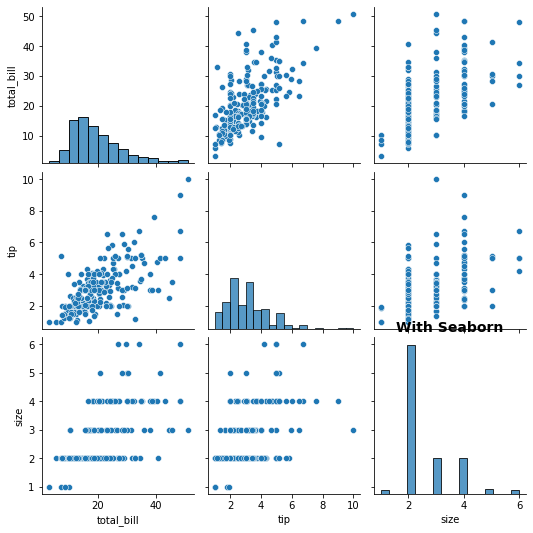

In [ ]:
sns.pairplot(data=tips)
plt.title('With Seaborn',fontsize=14,weight='bold')

plt.show()

## Heat Maps, *again*

Mapas de Calor também podem ser empregados para explorar **relações lineares** entre os dados exibindo por diferentes  cores os níveis de correlação dos pares de variáveis.  

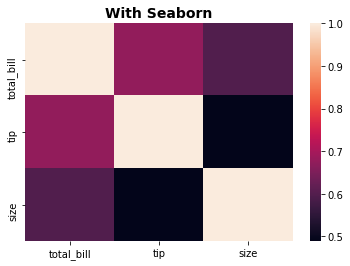

In [ ]:
sns.heatmap(tips[['total_bill','tip','size']].corr())
plt.title('With Seaborn',fontsize=14,weight='bold')

plt.show()

O gráfico acima permite, do mesmo modo que o correlograma, identificar uma relação mais linear entre *total_bill* e *tip*, que entre as variáveis *total_bill* e *size*, ou `size` e `tip`. Mas a correlação só permite explorar relações lineares entre os dados e o correlograma é mais geral, podendo exibir outros padrões dos dados. 

# Outros Gráficos 

Como uma introdução, esse texto não aborda nem todas formas de visualização de dados e nem muitas outras bibliotecas que podem ser muito úteis na produção de gráficos mais especializados como nuvens de palavras (*word clouds*), gráficos de mapas, diagramas de calor, construção de *dashboards*, gráficos 3D etc. No ambiente `Python` a maior parte delas, entretanto, é construída sobre o pacote `Matplotlib`, assim como o `Seaborn` e os conceitos aqui aprendidos serão bastante úteis para você empregá-las. O próprio `Pandas` implementa uma integração útil com o `Matplotlib` para a visualização de `DataFrames`. 

Fica como sugestão você explorar o pacote `plotly` (exemplo abaixo) que permite produzir várias das visualizações que criamos aqui em gráficos *dinâmicos* e a integração do `Pandas` com o `Matplotlib` (veja links na seção *Recursos*). 

In [ ]:
import plotly.express as px
df = px.data.gapminder() # .query("country=='Brazil'")
df = df[ df.country.isin(['Brazil','France','United States','Angola','Japan','China','Somalia','India'])]
fig = px.line(df, x="year", y="lifeExp", color= "country" ,title='Expectativa de Vida dos Países')
fig.show()

# Resumo `Matplotib`

O código abaixo resume, de modo bastante simples, os principais gráficos do `Matplotlib`. 

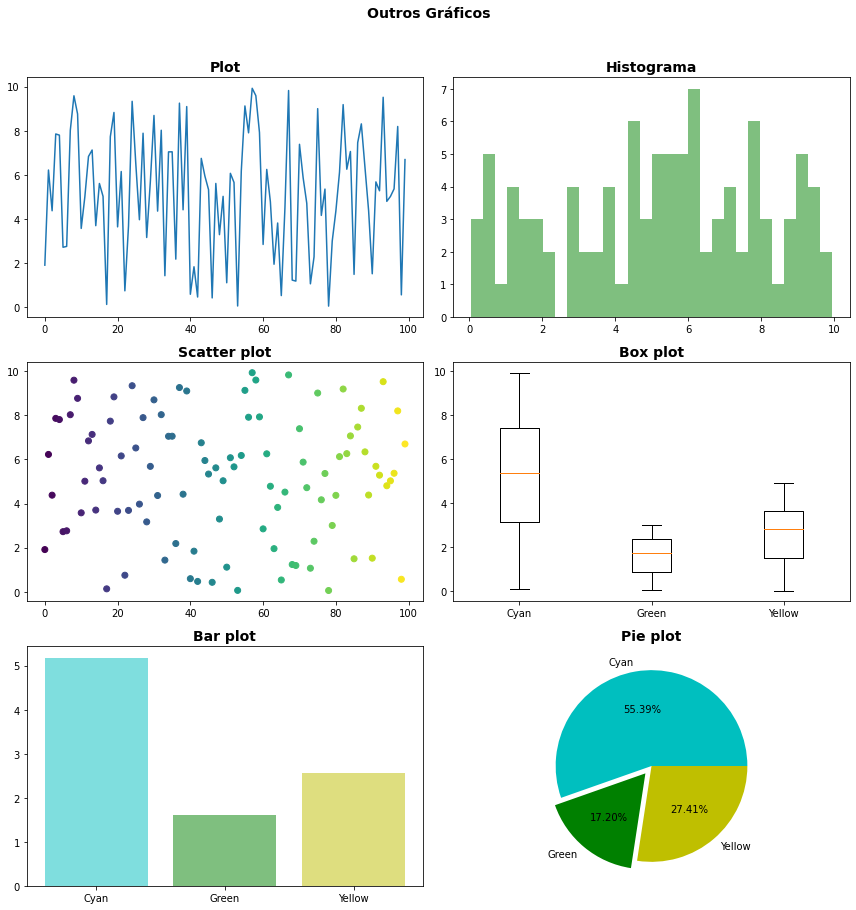

In [ ]:
# apenas a produção dos dados
x = np.random.random_sample(100)
np.random.seed(1234)

x = np.arange(0,100,1)
y = np.random.rand(100)*10
z = np.random.rand(100)*3
t = np.random.rand(100)*5

from matplotlib import cm # para cores no scatter plot

plt.figure(figsize=(12,12))                         
plt.suptitle('Outros Gráficos', fontsize=14, weight='bold', y=1.05)

plt.subplot(3, 2, 1)  
plt.plot(x,y)    
plt.title('Plot', fontsize=14, weight='bold') 

plt.subplot(3, 2, 2)  
plt.hist(y, bins=30, color='g', alpha=0.5)     
plt.title('Histograma', fontsize=14, weight='bold')    
             
plt.subplot(3, 2, 3)  
plt.scatter(x,y,c=x,cmap=cm.viridis)    
plt.title('Scatter plot', fontsize=14, weight='bold') 

plt.subplot(3, 2, 4)  
plt.boxplot([y,z,t],labels=['Cyan','Green','Yellow'])    
plt.title('Box plot', fontsize=14, weight='bold')

plt.subplot(3, 2, 5)  
plt.bar(['Cyan','Green','Yellow'],[y.mean(),z.mean(),t.mean()],color=['c','g','y'],alpha=0.5)    
plt.title('Bar plot', fontsize=14, weight='bold')

plt.subplot(3, 2, 6)  
plt.pie([y.mean(),z.mean(),t.mean()],
        colors=['c','g','y'],
        explode=[0, 0.1, 0],
        labels=['Cyan','Green','Yellow'],
        autopct='%1.2f%%')    
plt.title('Pie plot', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


# Resumo `Seaborn`

O código abaixo traz os mesmos gráficos produzidos anteriormente como o `Matplotlib` com o `Seaborn`, sendo um resumo, também de modo bastante simples, os principais gráficos do `Seaborn`. 

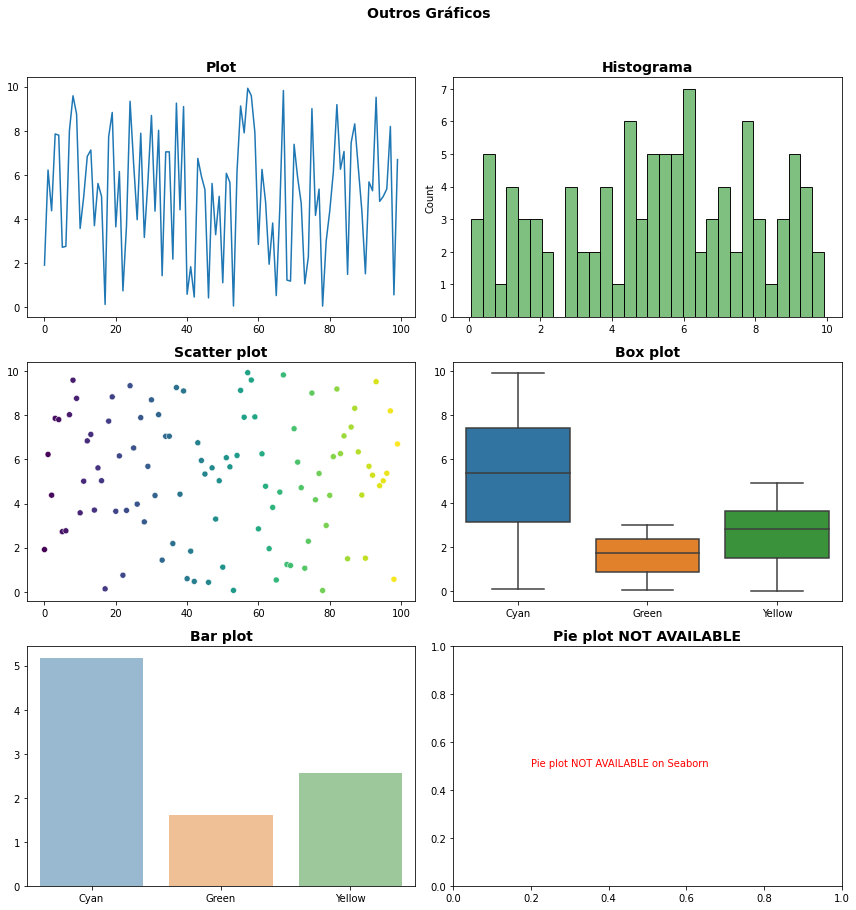

In [ ]:
import seaborn as sns
import pandas as pd

# apenas a produção dos dados
x = np.random.random_sample(100)
np.random.seed(1234)

x = np.arange(0,100,1)
y = np.random.rand(100)*10
z = np.random.rand(100)*3
t = np.random.rand(100)*5

from matplotlib import cm # para cores no scatter plot

fig, ax = plt.subplots(3,2,figsize=(12,12))  
 
plt.suptitle('Outros Gráficos', fontsize=14, weight='bold', y=1.05)

sns.lineplot(x=x,y=y,ax=ax[0,0])                                        # x= e y= para evitar warnings....
ax[0,0].set_title('Plot', fontsize=14, weight='bold') 

sns.histplot(y, bins=30, color='g', alpha=0.5,ax=ax[0,1])               # para subplots somente aceite facegrid, um recurso avançado para múltiplos plots
ax[0,1].set_title('Histograma', fontsize=14, weight='bold')
             
sns.scatterplot(x=x,y=y,c=x,cmap=cm.viridis,ax=ax[1,0])                 # x= e y= para evitar warnings....
ax[1,0].set_title('Scatter plot', fontsize=14, weight='bold') 

box = pd.DataFrame({'Cyan':y,'Green':z,'Yellow':t})                     # boxplot para ser simples empregamos um dataframe para uso da função melt  
sns.boxplot(data=box,ax=ax[1,1])   
ax[1,1].set_title('Box plot', fontsize=14, weight='bold')

sns.barplot(x=['Cyan','Green','Yellow'],y=[y.mean(),z.mean(),t.mean()],alpha=0.5,ax=ax[2,0])   # x= e y= para evitar warnings.... 
ax[2,0].set_title('Bar plot', fontsize=14, weight='bold')

# não temos pie plot no seaborn
plt.text(0.2, 0.5,'Pie plot NOT AVAILABLE on Seaborn', color='r')
ax[2,1].set_title('Pie plot NOT AVAILABLE', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# Recursos Úteis

## Galerias de Gráficos

Além dos sites dos pacotes, em que você encontra diversos exemplos de código, estes sites trazem inúmeros exemplos úteis de gráficos:

1. https://www.data-to-viz.com/. Traz uma classificação de tipos de gráfico com base no formato de dados de entrada (dados numéricos, categóricos etc.) e apresenta uma árvore de decisão que leva a um conjunto de visualizações potencialmente mais adequadas. Aprensenta ainda exemplos em `Python`, `R` e `D3.js`. 

2. https://www.python-graph-gallery.com/. Uma biblioteca com centenas exemplos de gráficos produzidos em Python. Os gráficos estã organizados em cerca de 40 seções e sempre vêm com um código exemplo associado empregando principalmente com `Matplotlib`, mas também os pacotes `Seaborn` e `Plotly`.









## Pacotes e outros links úteis

Alguns Pacotes úteis para visualização de dados.

1. **`Matplotlib`** https://matplotlib.org/  Visualization with Python, API e Docs.

1. **`Seaborn`** https://seaborn.pydata.org/  Statistical Data Visualization, API e Docs.

1. **`Plotly`** https://plotly.com/  Biblioteca `Python` para a construção de *dashboards* e gráficos dinâmicos.

1. **`Pandas Visualization`** https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html. Integração do `Pandas` com `Matplotlib` para a visualização de `DataFrames` e `Series`.

1. **`w3Schools`** https://www.w3schools.com/ Tutoriais básicos de `Python`, `Numpy`, `Pandas` e `Matplotlib` dentre outros.

1. **Pandas Cheat Sheet.** https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

1. **Matplotlib Cheat Sheet.** https://github.com/rougier/matplotlib-cheatsheet

2. **Charting in Colaboratory** https://colab.research.google.com/notebooks/charts.ipynb Gráficos em comandos básicos no Google Colaboratory.







# Síntese

Nesta trilha você aprendeu a empregar as bibliotecas `Matplotlib` e `Seaborn` para criar visualizações dos dados que são muito úteis para exploração e compreenção de grandes conjuntos de dados. 

A visualização de dados é antes de tudo uma forma de transmitir ou comunicar os dados com precisão e podemos dividi-la em dois tipos básico, os gráficos de **Exploração dos Dados** e os gráficos de **Apresentação**, com requisitos bastante diferentes. 

A divisão em gráficos de **Evolução, Distribuições, Quantidades e Proporções e Relações**, é didática e ajuda você a entender o propósito de cada tipo de gráfico. Ela indica os gráficos mais comuns para cada propósito, mas vale lembrar, os gráficos fornevem uma análise muito mais ampla e, em geral, exibem múltiplos aspectos dos dados.



## Para saber mais

Acesse e explore esse tutorial do **Scipy Lecture Notes** de introdução ao `Matplotlib`, http://scipy-lectures.org  
  
  > http://scipy-lectures.org/intro/matplotlib/index.html
  
  > https://scipy-lectures.org/_downloads/ScipyLectures-simple.pdf

Acesse, 

> Selva Prabhakaran. **Top 50 matplotlib Visualizations – The Master Plots (with full python code)** https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

E veja inúmeros exemplos de gráficos com o `Matplotlib`.

E se você quer entender um pouco mais sobre visualização de dados em geral, isto é, independente das ferramentas que são empregadas, você pode assistir a 

> **Video** Kieran Healy **Principles of Data Visualization** https://youtu.be/wHrzsO564uA.



## Referências

1. Claus O. Wilke. **Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures** (2019) Disponível em: https://clauswilke.com/dataviz/ Acesso: 17.05.2021 

1. Jake VanderPlas. **Python Data Science Handbook**. O'Reilly Media, Inc. (2016). ISBN: 9781491912058. 
Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. Acesso: 17.05.2021 

1. Rogério de Oliveira. **Introdução à Visualização de Dados com Python**.  Ed. Mackenzie. Coleção Conexão Inicial. *pre-print (2021)* Disponível em: https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python.Acesso: 17.05.2021 